# MILESTONE 1 PHASE 1

# 1. Perkenalan

* Nama. : Ajeng Nilta Adriani
* Batch : FTDS - 002

### Dataset 

Data yang digunakan dalam tugas ini diambil dari Set Data Machine Learning di BigQuery Google Public Dataset. Data diambil dengan menanyakan tabel credit_card_default.

Kolom yang akan saya gunakan adalah `limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month`.

Link Dataset : https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=ajeng-nilta-adriani&ws=!1m10!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default!1m4!1m3!1sajeng-nilta-adriani!2sbquxjob_5489c593_1846f19f6c1!3sUS

# 2. Import Libraries

In [1]:
try:
    import xgboost
except ImportError as ex:
    print('Error: the xgboost library is not installed.')
    xgboost = None

In [2]:
!pip install xgboost

In [3]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# For Classifier Problems

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Evaluate Regression Models
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

from time import time

# 3 - Data Loading

Data tersebut diperoleh dari BigQuery Google Public Data, saya menggunakan MySQL untuk mendapatkan data tersebut. Inilah kueri yang saya gunakan :

```
SELECT 
      limit_balance,
      sex, education_level,
      marital_status,
      age, 
      pay_0, 
      pay_2, 
      pay_3, 
      pay_4, 
      pay_5, 
      pay_6, 
      bill_amt_1, 
      bill_amt_2, 
      bill_amt_3, 
      bill_amt_4, 
      bill_amt_5, 
      bill_amt_6, 
      pay_amt_1, 
      pay_amt_2, 
      pay_amt_3, 
      pay_amt_4, 
      pay_amt_5, 
      pay_amt_6, 
      default_payment_next_month,
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 3988
```

dan dibawah ini load data dengan nama df. Saya akan menampilkan 5 baris pertama dan 5 baris terbaru :

In [4]:
df = pd.read_csv('h8dsft_P1M1_Ajeng_Nilta_Adriani.csv.csv', na_values=['?',' ','99999','N/A'],skipinitialspace = True)
df.head(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [5]:
df.tail(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,-1,628,662,596,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,0,10886,11697,14479,10775,10998,12655,1300,3005,0,700,2000,1500,0


**Pemahaman tentang dataset**

Kami pertama-tama akan meninjau kolom kumpulan data untuk memahami variabel dan melihat apakah perlu ada perubahan. Ini adalah informasi yang disediakan untuk kolom oleh sumber dataset:
```txt
ID              : ID klien
limit_balance   : Jumlah kredit yang diberikan dalam dolar, termasuk kredit individu dan tambahan.
sex             : Jenis kelamin pelanggan (1 = laki-laki, 2 = perempuan)
education_level : (1 = pascasarjana; 2 = sarjana; 3 = sekolah menengah atas; 4 = lainnya, 5 = tidak 
                  diketahui, 6 = tidak diketahui)
marital_status  : (1 = menikah; 2 = lajang; 3 = lainnya)
age             : Usia pelanggan
pay_1           : Riwayat status pelunasan sebelumnya, apakah dibayar tepat waktu atau keterlambatan 
                  pembayaran. pay_0 = status pembayaran di bulan September. Skala (berlaku untuk pay_0 
                  to pay_6): -1 = Pembayaran tepat waktu, 1 = keterlambatan pembayaran selama 1 bulan, 
                  2 = penundaan pembayaran selama 2 bulan, ... 9 = penundaan pembayaran selama 9 bulan 
                  dan lebih)
pay_2           : status pembayaran di bulan Agustus
pay_3           : status pembayaran di bulan July
pay_4           : status pembayaran di bulan June
pay_5           : status pembayaran di bulan May
pay_6           : status pembayaran di bulan April
bill_amt1       : Jumlah tagihan pada bulan September
bill_amt2       : Jumlah tagihan pada bulan August
bill_amt3       : Jumlah tagihan pada bulan July
bill_amt4       : Jumlah tagihan pada bulan June
bill_amt5       : Jumlah tagihan pada bulan May
bill_amt6       : Jumlah tagihan pada bulan April
pay_amt1        : Jumlah yang dibayarkan di bulan September
pay_amt2        : Jumlah yang dibayarkan di bulan August
pay_amt3        : Jumlah yang dibayarkan di bulan July
pay_amt4        : Jumlah yang dibayarkan di bulan June
pay_amt5        : Jumlah yang dibayarkan di bulan May
pay_amt6        : Jumlah yang dibayarkan di bulan April
default         : apakah klien gagal membayar pada bulan Oktober (0 = Tidak, 1 = Ya)
```

# 4 - Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Dataset ini berisi 2.964 observasi dari 24 variabel; di mana setiap pengamatan sesuai dengan klien kartu kredit tertentu.

Sekarang, saatnya untuk memeriksa nilai-nilai yang hilang dalam dataset.

In [7]:
df[df.duplicated()].shape

(1, 24)

Terdapat 1 data yang duplikat.

In [8]:
df.drop_duplicates(inplace=True)
df[df.duplicated()].shape

(0, 24)

In [9]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [10]:
df.shape

(2964, 24)

In [11]:
num = df.describe().columns.tolist()
cat = df.select_dtypes(include=['object']).columns.tolist()

In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


In [13]:
e_m = ['education_level', 'marital_status', 'pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

for col in e_m:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable education_level
2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

Frequency of Categories for variable marital_status
2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

Frequency of Categories for variable pay_0
 0    1516
-1     540
 1     355
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_0, dtype: int64

Frequency of Categories for variable pay_2
 0    1607
-1     580
 2     374
-2     352
 3      32
 4       8
 1       4
 7       3
 6       2
 5       2
Name: pay_2, dtype: int64

Frequency of Categories for variable pay_3
 0    1610
-1     580
 2     368
-2     366
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64

Frequency of Categories for variable pay_4
 0    1667
-1     532
-2     407
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype

Pada pay_1 sampai pay_6 terdapat nilai -2 dan 0. Menurut saya, jika nilai 1 sampai 9 mewakili keterlambatan seseorang dalam membayar utang kartu kreditnya, kemudian kenapa ada nilai 0? itu harus sama dengan membayar sepatutnya. Saya akan mengubah nilai -2 dan 0 sedangkan 0 mewakili pembayaran yang sepatutnya.

Oleh karena itu, saya akan memanipulasi beberapa kolom untuk pemahaman yang lebih baik.

# 5 - Manipulasi Kolom

### Manipulasi Kolom education_level

<AxesSubplot:xlabel='education_level', ylabel='count'>

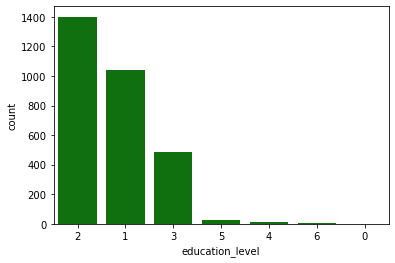

In [14]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='education_level', order = df['education_level'].value_counts().index, color='green')

Bisa dilihat dari grafik di atas, terdapat nilai 5 dan 6 sangat dikit jumlahnya. Saya akan mengubah nilai 5 dan 6 menjadi 4.

In [15]:
df['education_level'] = df['education_level'].apply(lambda edu_value: edu_value 
                                        if ((edu_value > 0 and edu_value < 4)) 
                                        else 4) # Changes every value of x not within (and inclusive of) 1 ~ 3 to 4  

# Corrected changes
df['education_level'].unique()

array([3, 1, 2, 4], dtype=int64)

### Manipulasi Kolom marital_status

<AxesSubplot:xlabel='marital_status', ylabel='count'>

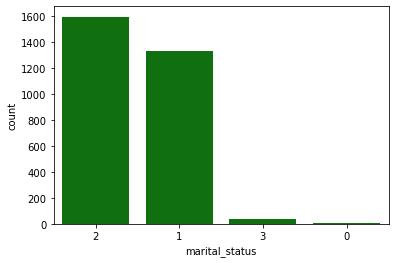

In [16]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='marital_status', order = df['marital_status'].value_counts().index, color='green')

Dari grafik di atas terlihat bahwa terdapat nilai 0 pada marital_status. Saya juga akan mengubah nilai 0 menjadi 3.

In [17]:
df['marital_status'] = df['marital_status'].apply(lambda marriage_value: marriage_value
                                     if (marriage_value > 0 and marriage_value < 3)
                                     else 3) # changes every value of x not within (and inclusive of) 1 and 2 to 3

# Corrected changes
df['marital_status'].unique()

array([3, 1, 2], dtype=int64)

### Manipulasi Kolom pay_1 ~ pay_6

In [18]:
df.loc[:, 'pay_0'] = df.loc[:, 'pay_0'].replace(-2,0)
df.loc[:, 'pay_0'] = df.loc[:, 'pay_0'].replace(-1,0)
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-2,0)
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-1,0)
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-2,0)
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-1,0)
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-2,0)
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-1,0)
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-2,0)
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-1,0)
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-2,0)
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-1,0)

### Mengganti Nama Kolom

Saya akan mengganti nama 2 kolom agar lebih mudah untuk dianalisis. Nama kolom yang akan saya ubah adalah pay_0 dan payment.

In [19]:
df.rename(columns={'pay_0':'pay_1',
                   'default_payment_next_month':'payment',} , inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limit_balance    2964 non-null   int64
 1   sex              2964 non-null   int64
 2   education_level  2964 non-null   int64
 3   marital_status   2964 non-null   int64
 4   age              2964 non-null   int64
 5   pay_1            2964 non-null   int64
 6   pay_2            2964 non-null   int64
 7   pay_3            2964 non-null   int64
 8   pay_4            2964 non-null   int64
 9   pay_5            2964 non-null   int64
 10  pay_6            2964 non-null   int64
 11  bill_amt_1       2964 non-null   int64
 12  bill_amt_2       2964 non-null   int64
 13  bill_amt_3       2964 non-null   int64
 14  bill_amt_4       2964 non-null   int64
 15  bill_amt_5       2964 non-null   int64
 16  bill_amt_6       2964 non-null   int64
 17  pay_amt_1        2964 non-null   int64
 18  pay_amt_

Dan sekarang saya akan mengatur ulang indeks data saya.

In [20]:
df.reset_index(drop=True)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
0,50000,1,3,3,50,0,0,0,0,0,0,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,3,45,0,0,0,0,0,0,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,320000,1,2,1,41,1,0,0,0,0,0,0,0,0,0,700,860,0,0,0,700,860,2420,1
2960,20000,1,1,1,39,0,0,0,0,0,0,628,662,596,630,664,598,700,600,700,700,600,1400,0
2961,20000,1,2,2,25,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0
2962,50000,1,2,2,38,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.841768,0.739144,1.0,1.00,2.0,2.00,4.0
marital_status,2964.0,1.564103,0.521822,1.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_1,2964.0,0.353576,0.775392,0.0,0.00,0.0,0.00,8.0
pay_2,2964.0,0.311404,0.800265,0.0,0.00,0.0,0.00,7.0
pay_3,2964.0,0.301619,0.799585,0.0,0.00,0.0,0.00,7.0
pay_4,2964.0,0.269568,0.787520,0.0,0.00,0.0,0.00,8.0
pay_5,2964.0,0.242240,0.755243,0.0,0.00,0.0,0.00,7.0


* default.payment.next.month namanya diubah menjadi payment
* PAY_0 hingga PAY_1
* Mengelompokkan kategori tingkat pendidikan yang tidak diketahui (0,5,6) dan menugaskannya kembali ke 4 (lainnya)
* Mengelompokkan kategori nikah_status yang tidak diketahui (0) dan menetapkannya kembali ke 3 (lainnya)
* Mengubah nilai negatif di pay_1 ~ pay_6 menjadi 0

# 6 - EDA for Analysis Purpose

[Text(0, 0, '2329'), Text(0, 0, '635')]

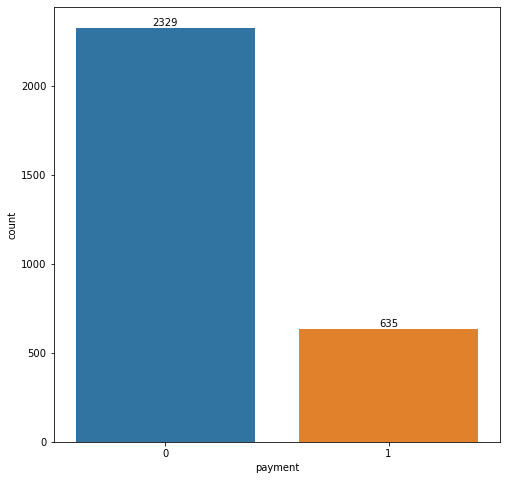

In [22]:
plt.figure(figsize=(8,8))
cp = sns.countplot(data=df, x='payment')
cp.bar_label(cp.containers[0], label_type='edge')

Terlihat Fitur Target `Payment` dengan kategori `0` memiliki proporsi yang lebih banyak daripada data dengan kategori `1`. Data dengan kategori `0` memiliki proporsi sebanyak **2329** sedangkan data dengan kategori `1` memiliki proporsi **635**. Berarti data tersebut imbalance.

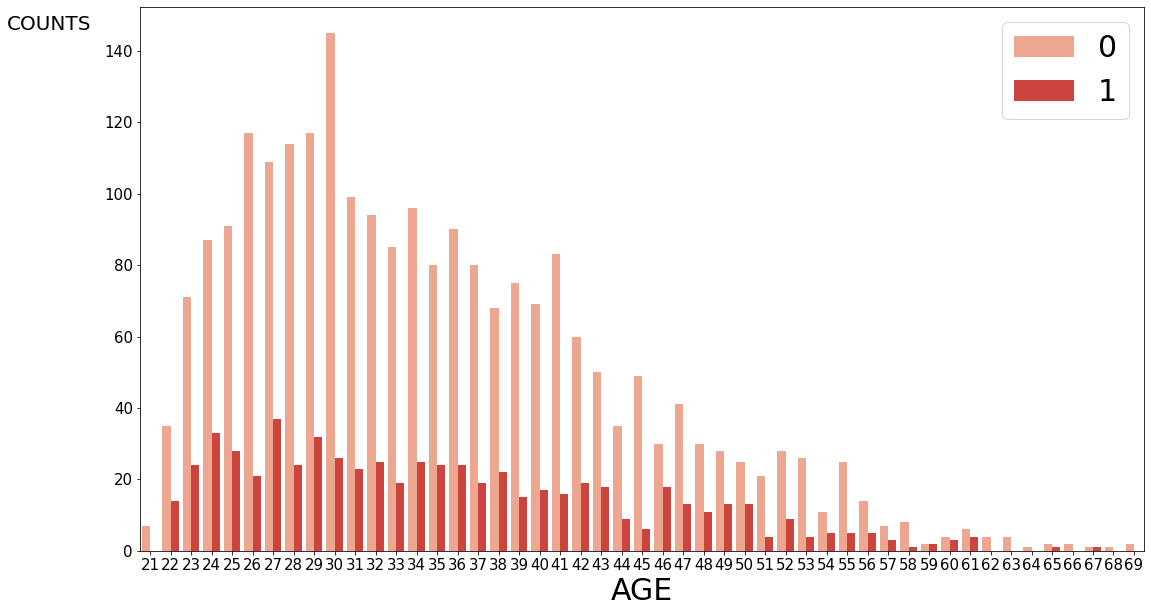

In [23]:
# By Age
fig, axz = plt.subplots(figsize=(18,10))

axz = sns.countplot(x='age', hue='payment', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('AGE', size=30)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15) 

Dari grafik di atas, informasi yang dapat saya artikan adalah NonDefault memiliki proporsi yang lebih tinggi pada orang berusia 26-36 tahun.

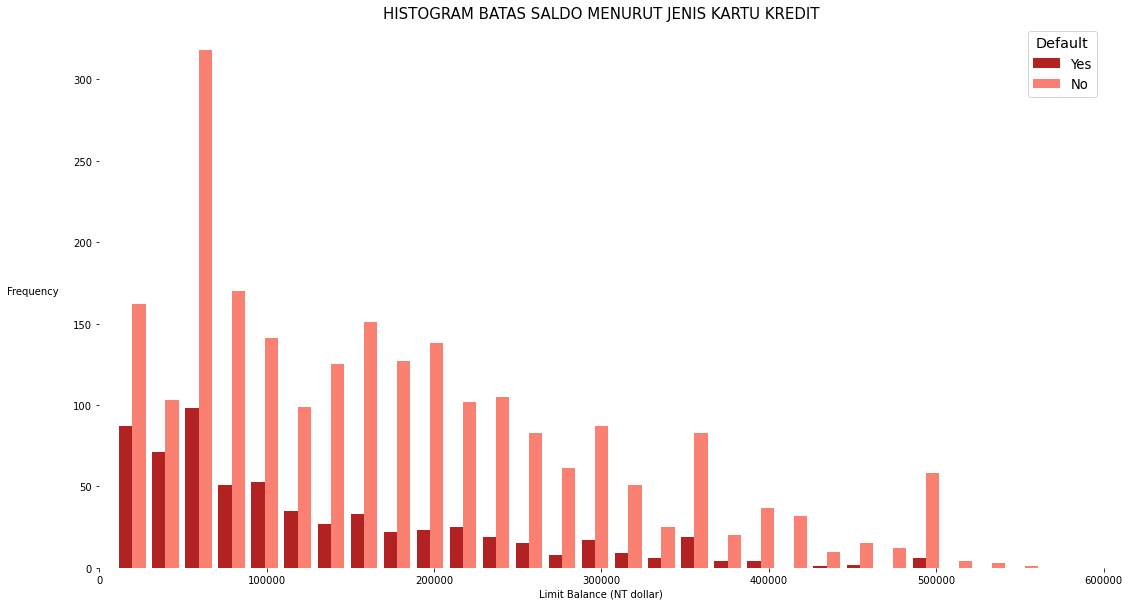

In [24]:
x1 = list(df[df['payment'] == 1]['limit_balance'])
x2 = list(df[df['payment'] == 0]['limit_balance'])

fig2, ax_lim_bal = plt.subplots(figsize=(18,10))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['firebrick', 'salmon'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency', rotation=0,labelpad=40)
plt.title('HISTOGRAM BATAS SALDO MENURUT JENIS KARTU KREDIT', size=15)
plt.box(False)

Saya telah memisahkan limit_balance berdasarkan tipe payment. Pengamatan saya adalah bahwa ini memberi tahu saya bahwa saldo batas bawah mungkin memiliki peluang lebih tinggi untuk menjadi wanprestasi dibandingkan dengan kartu kredit dengan saldo batas lebih tinggi.

# 7 - Data Preprocessing

## Categorical Features

Untuk konteks, saya akan menuliskan kembali kamus data yang telah direvisi untuk variabel kategori.

* limit_balance : Jumlah kredit yang diberikan (Dolar NT). Ini mencakup kredit konsumen individu dan kredit keluarganya (tambahan).
* jenis kelamin : Jenis kelamin seseorang ( 1 = laki-laki, 2 = perempuan)
* education_level : Tingkat pendidikan seseorang ( 1 = sekolah pascasarjana, 2 = universitas, 3 = SMA, 4 = lainnya )
* marital_status: Status perkawinan seseorang ( 1 = menikah, 2 = lajang; 3 = lainnya )
* pay_1 ~ pay_6 : Riwayat pembayaran masa lalu seseorang.
  - pay_1: Status pembayaran pada bulan September, 2005 (0=membayar sebagaimana mestinya, 1=penundaan pembayaran selama satu bulan, 2=penundaan pembayaran  selama dua bulan, ... 8=penundaan pembayaran selama delapan bulan, 9=penundaan pembayaran selama sembilan bulan ke atas )
  - pay_2: Status pembayaran pada bulan Agustus 2005 (skala sama seperti di atas)
  - pay_3: Status pembayaran pada Juli 2005 (skala sama seperti di atas)
  - pay_4: Status pembayaran pada bulan Juni 2005 (skala sama seperti di atas)
  - pay_5: Status pembayaran pada bulan Mei 2005 (skala sama seperti di atas)
  - pay_6: Status pembayaran pada bulan April 2005 (skala sama seperti di atas)
  
Baiklah, sekarang saya akan membuat kerangka data baru hanya untuk variabel kategori.

In [25]:
df_cat = df[['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'payment']]
df_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
0,1,3,3,0,0,0,0,0,0,0
1,2,3,3,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0
3,1,2,1,0,0,0,0,0,0,1
4,1,2,1,0,0,0,0,0,2,0


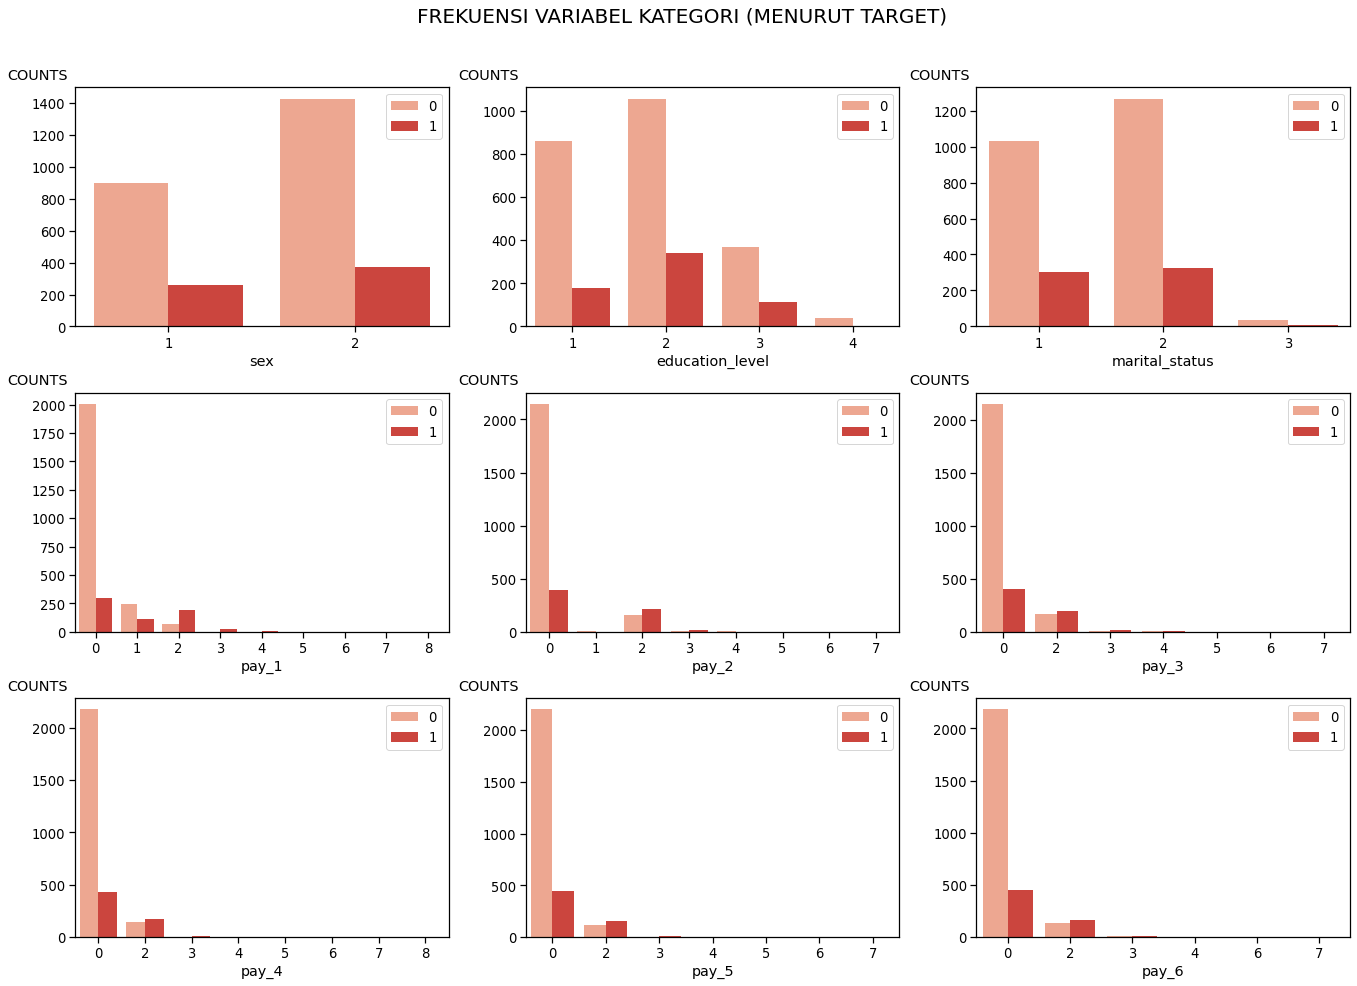

In [26]:
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREKUENSI VARIABEL KATEGORI (MENURUT TARGET)",size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.countplot(x='sex', hue = 'payment', data=df_cat, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='education_level', hue = 'payment', data=df_cat, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='marital_status', hue = 'payment', data=df_cat, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='pay_1', hue = 'payment', data=df_cat, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='pay_2', hue = 'payment', data=df_cat, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='pay_3', hue = 'payment', data=df_cat, palette='Reds', ax=axes[1,2])
ax7 = sns.countplot(x='pay_4', hue = 'payment', data=df_cat, palette='Reds', ax=axes[2,0])
ax8 = sns.countplot(x='pay_5', hue = 'payment', data=df_cat, palette='Reds', ax=axes[2,1])
ax9 = sns.countplot(x='pay_6', hue = 'payment', data=df_cat, palette='Reds', ax=axes[2,2])

# Setting legends to upper right
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")
ax6.legend(loc="upper right")
ax7.legend(loc="upper right")
ax8.legend(loc="upper right")
ax9.legend(loc="upper right")

# Changing ylabels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

Berikut pengamatan saya berdasarkan grafik yang telah saya visualisasikan:

* NonDefault memiliki proporsi Wanita yang lebih tinggi (Jenis Kelamin = 2)
* NonDefault memiliki proporsi pendidikan yang lebih tinggi (PENDIDIKAN=1 atau 2)
* NonDefault memiliki proporsi Singles yang lebih tinggi (MARRIAGE=1)
* NonDefaults memiliki proporsi yang JAUH lebih tinggi dari nol variabel PAY_X (ini berarti bahwa pembayaran yang     sepatutnya dikaitkan dengan tidak default di bulan berikutnya).

## Numerical Feature

In [27]:
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()

# skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

Buat fungsi untuk menentukan distribusi dan deteksi skew setiap kolom dalam data numerik

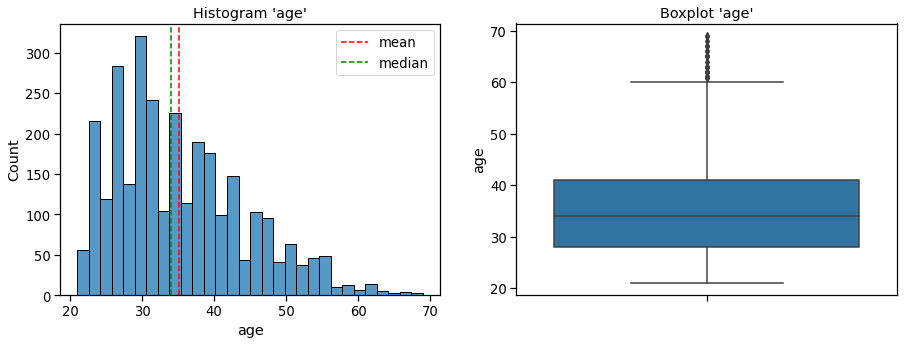

age Kurtosis: 0.08182141850805058
age Skewness: 0.7726317877077616
Columns 'age' right skewed


In [28]:
# checking the distribution of distance
plot_dist(df, 'age')

Untuk age distribusi datanya termasuk right skew dengan nilai skew lebih dari 0.5 yaitu, 0.7 namun tidak berbeda secara signifikan. Dan jika melihat boxplotnya terlihat adanya outliers.

In [29]:
# outlier detection using IQR 
Q3 = df['age'].quantile(.75)
Q1 = df['age'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df[(df['age'] > upper) | (df['age'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  29
percentage of outlier:  0.9784075573549258 %


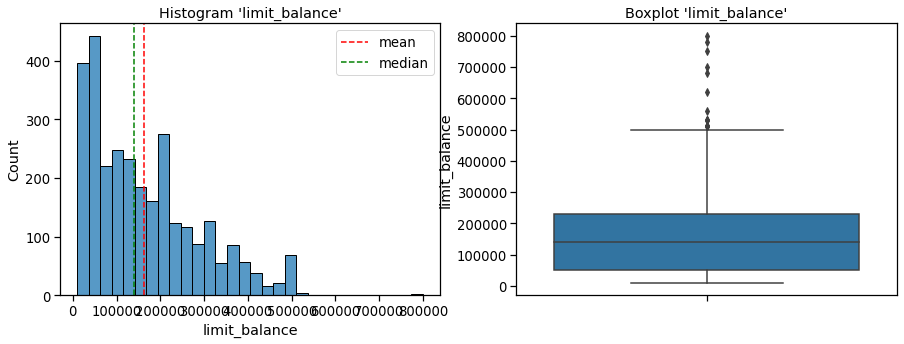

limit_balance Kurtosis: 0.6996887055637564
limit_balance Skewness: 1.0006047564306488
Columns 'limit_balance' right skewed


In [30]:
# checking the distribution of limit_balance
plot_dist(df, 'limit_balance')

In [31]:
# outlier detection using IQR 
Q3 = df['limit_balance'].quantile(.75)
Q1 = df['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = df[(df['limit_balance'] > upper) | (df['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent limit_balance of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  2
percent limit_balance of outlier:  0.06747638326585695 %


In [32]:
df_bill = df[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']]

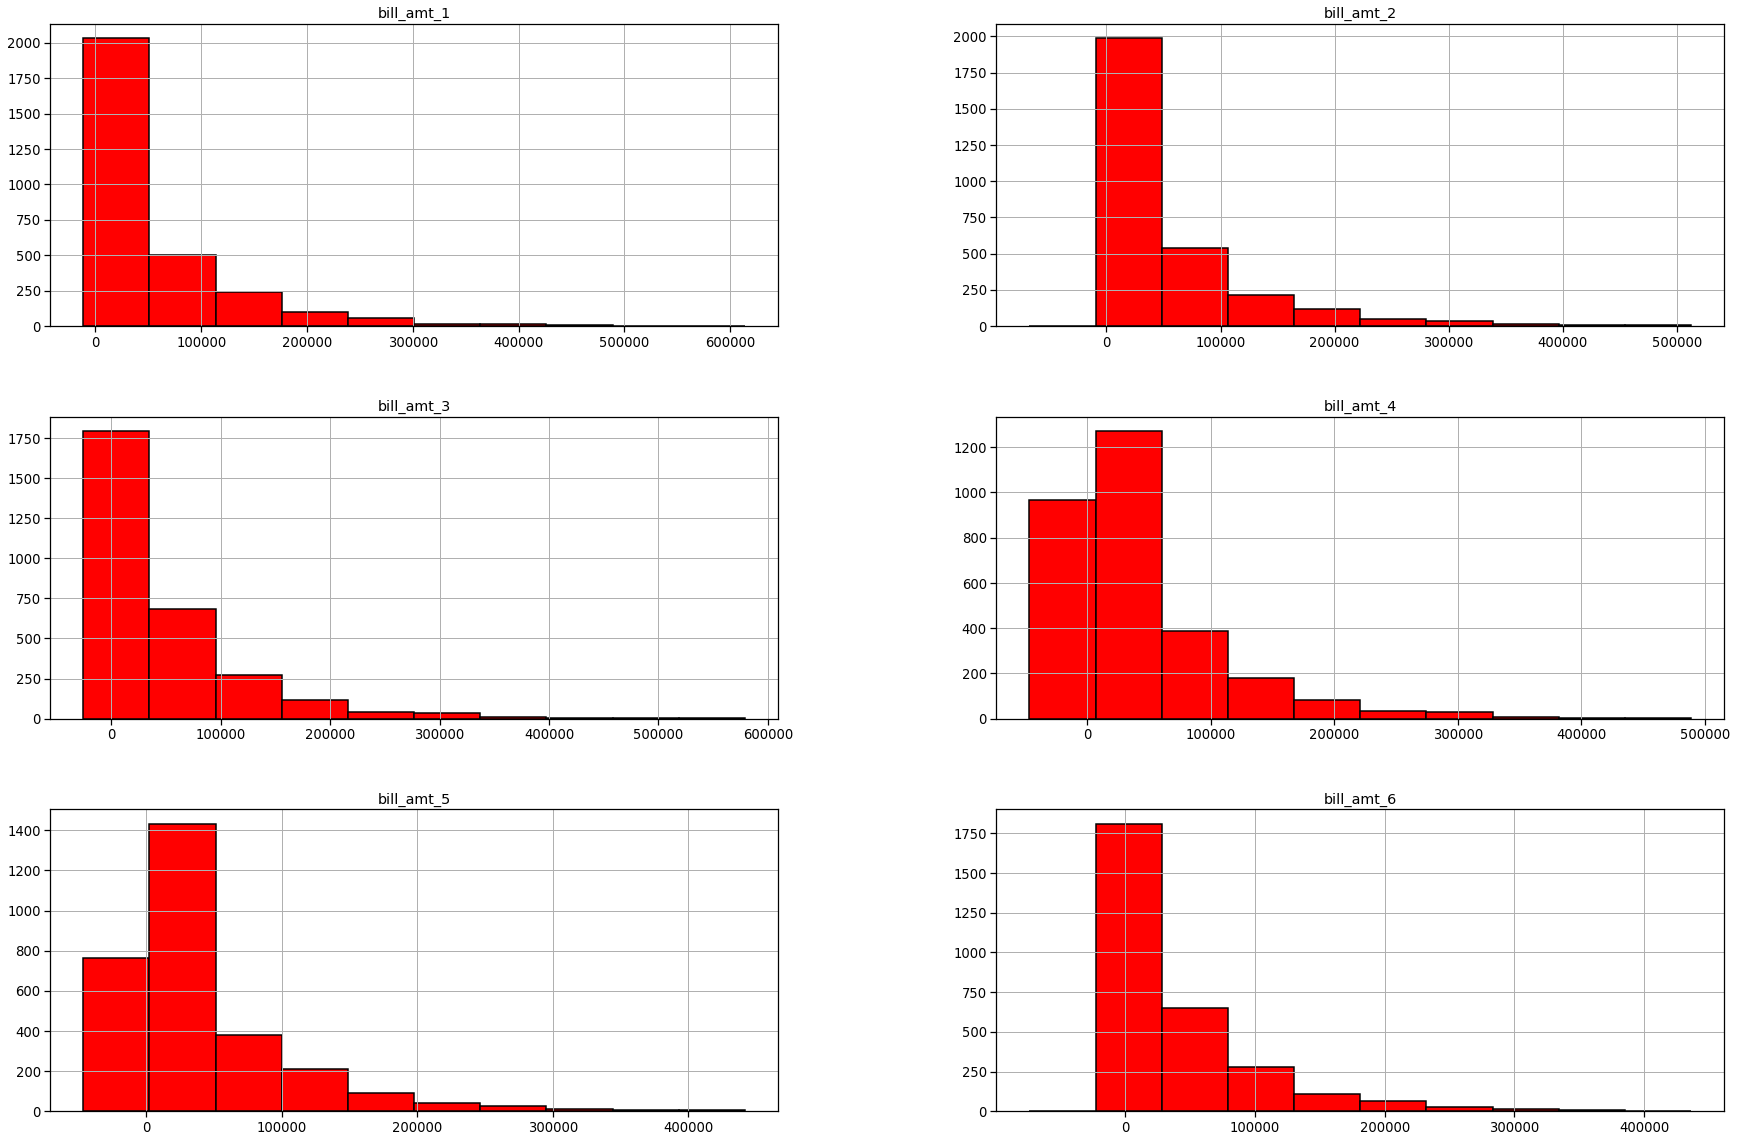

In [33]:
distribution = df_bill.hist(edgecolor = 'black', linewidth = 1.5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(30,20)
plt.show()

In [34]:
def outlier_analysis(df_bill,col):
  skewness = df_bill[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = df_bill[col].mean() + 3*df_bill[col].std()
    lower = df_bill[col].mean() - 3*df_bill[col].std()
  else:
    Q1 = df_bill[col].quantile(0.25)
    Q3 = df_bill[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  no_outliers = df_bill[(df_bill[col]>=lower) & (df_bill[col]<=upper)]
  outliers = df_bill[(df_bill[col]<lower) | (df_bill[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/df.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(df_bill.columns):
  outlier_analysis(df,i)

percentage outlier from bill_amt_1 : 2.496626180836707 %
percentage outlier from bill_amt_2 : 2.42914979757085 %
percentage outlier from bill_amt_3 : 2.395411605937922 %
percentage outlier from bill_amt_4 : 2.3616734143049936 %
percentage outlier from bill_amt_5 : 2.327935222672065 %
percentage outlier from bill_amt_6 : 2.1929824561403506 %


In [35]:
df_pay_amt = df[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']]

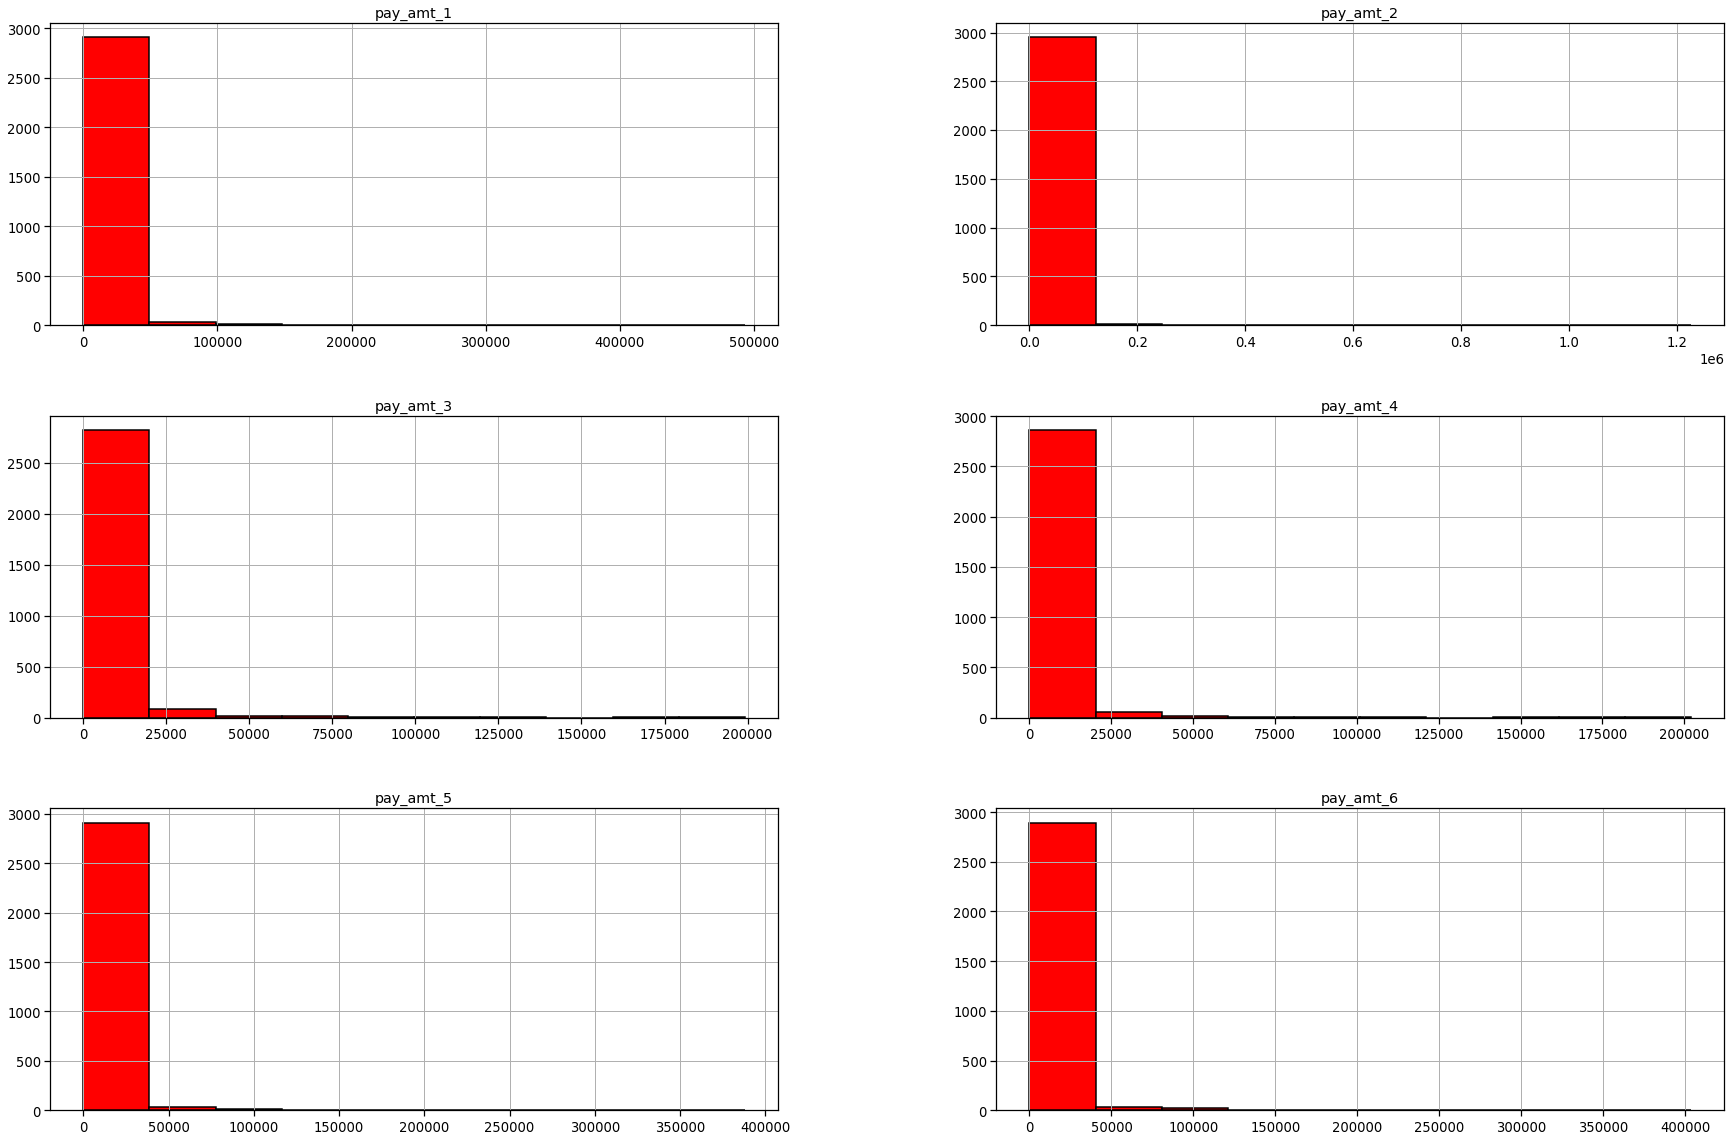

In [36]:
distribution = df_pay_amt.hist(edgecolor = 'black', linewidth = 1.5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(30,20)
plt.show()

In [37]:
def outlier_analysis(df_pay_amt,col):
  skewness = df_pay_amt[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = df_pay_amt[col].mean() + 3*df_pay_amt[col].std()
    lower = df_pay_amt[col].mean() - 3*df_pay_amt[col].std()
  else:
    Q1 = df_pay_amt[col].quantile(0.25)
    Q3 = df_pay_amt[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  no_outliers = df_pay_amt[(df_pay_amt[col]>=lower) & (df_pay_amt[col]<=upper)]
  outliers = df_pay_amt[(df_pay_amt[col]<lower) | (df_pay_amt[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/df.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(df_pay_amt.columns):
  outlier_analysis(df,i)

percentage outlier from pay_amt_1 : 1.214574898785425 %
percentage outlier from pay_amt_2 : 0.708502024291498 %
percentage outlier from pay_amt_3 : 1.5182186234817814 %
percentage outlier from pay_amt_4 : 1.5856950067476383 %
percentage outlier from pay_amt_5 : 1.214574898785425 %
percentage outlier from pay_amt_6 : 1.5519568151147098 %


In [38]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['limit_balance', 'age'])

df_eda = wins.fit_transform(df)

In [39]:
num_out = ['limit_balance', 'age']
# Compare before and after outlier handling
print('before handling: \n', df[num_out].describe()) 
print('after handling: \n', df_eda[num_out].describe())

before handling: 
        limit_balance          age
count    2964.000000  2964.000000
mean   163356.950067    35.193657
std    125049.701016     9.110949
min     10000.000000    21.000000
25%     50000.000000    28.000000
50%    140000.000000    34.000000
75%    230000.000000    41.000000
max    800000.000000    69.000000
after handling: 
        limit_balance          age
count    2964.000000  2964.000000
mean   162844.129555    35.164474
std    123216.433836     9.020939
min     10000.000000    21.000000
25%     50000.000000    28.000000
50%    140000.000000    34.000000
75%    230000.000000    41.000000
max    500000.000000    60.500000


### Feature Selection

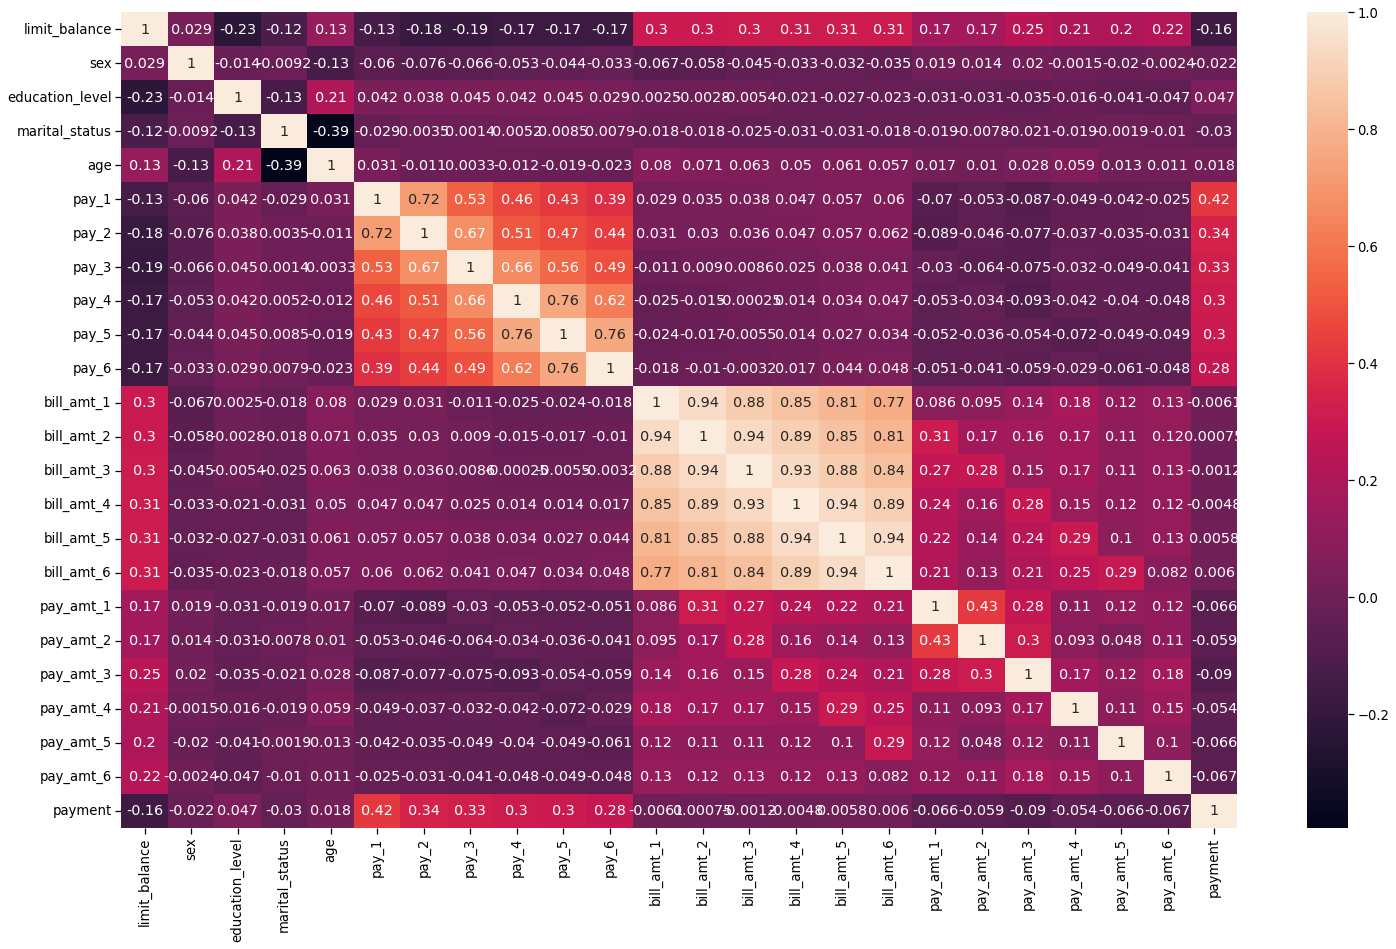

In [40]:
fig,ax = plt.subplots(figsize=[25,15])

corr = df_eda.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Dari heatmap di atas kita ketahui bahwa fitur yang paling berkorelasi dengan `Payment` adalah pay_1 ~ pay_6. Jadi, saya akan menggunakan fitur ini untuk model saya. Saya juga akan menggunakan usia karena, menurut penilaian pribadi saya, usia orang cenderung menjadi faktor apakah kartu kredit akan gagal bayar atau tidak. Seharusnya, orang yang berusia 30 tahun ke atas memiliki tingkat pengelolaan keuangan yang lebih baik daripada orang yang berusia 30 tahun ke bawah. Dan kemudian saya juga akan menggunakan perkawinan dan seks karena status perkawinan seseorang dapat mempengaruhi penggunaan kartu kredit mereka. Dan untuk seks hanya murni berdasarkan rasa ingin tahu. Menurut pendapat saya, biasanya perempuan memiliki pengelolaan uang atau anggaran yang lebih baik, sehingga perempuan lebih cenderung NonDefaulted. Terakhir, dengan visualisasi yang telah saya tunjukkan di bagian sebelumnya, orang yang memiliki tingkat_pendidikan lebih tinggi lebih cenderung NonDefault, jadi saya menganggap ini sebagai salah satu fitur saya.

Sekarang, saya akan mengubah beberapa tipe fitur karena fitur ini sebenarnya bersifat kategoris meskipun entri yang terdapat dalam fitur tersebut bersifat numerik.

In [41]:
df_eda['sex'] = df_eda['sex'].apply(str)
df_eda['education_level'] = df_eda['education_level'].apply(str)
df_eda['marital_status'] = df_eda['marital_status'].apply(str)
df_eda['pay_1'] = df_eda['pay_1'].apply(str)
df_eda['pay_2'] = df_eda['pay_2'].apply(str)
df_eda['pay_3'] = df_eda['pay_3'].apply(str)
df_eda['pay_4'] = df_eda['pay_4'].apply(str)
df_eda['pay_5'] = df_eda['pay_5'].apply(str)
df_eda['pay_6'] = df_eda['pay_6'].apply(str)

# 8 - Inference Model

Saya akan mengambil beberapa entri data untuk menjadi model inferensi saya. Hal ini dilakukan dengan tujuan untuk menguji model yang akan saya buat nanti.

In [42]:
df_inf = df_eda.sample(5, random_state=1)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
1766,180000.0,2,1,1,38.0,0,0,0,0,0,0,750,0,0,0,0,0,0,0,0,0,0,0,0
525,200000.0,2,2,1,27.0,1,3,2,2,2,2,183994,182427,182657,174547,181454,177141,5200,7000,0,13300,0,6200,1
1456,50000.0,1,2,2,26.0,2,0,0,0,0,0,291,291,291,291,291,0,291,291,291,291,0,873,0
929,240000.0,1,2,2,29.0,0,0,0,0,0,0,243774,242529,242079,243114,213930,219009,8891,12350,15969,7968,8700,17500,0
854,20000.0,2,2,2,39.0,0,0,0,0,0,0,20885,20373,19391,20085,19938,0,2157,1660,1300,541,0,0,0


In [43]:
df_train_test = df_eda.drop(df_inf.index)
df_train_test

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
0,50000.0,1,3,3,50.0,0,0,0,0,0,0,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000.0,2,3,3,45.0,0,0,0,0,0,0,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000.0,1,1,1,45.0,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000.0,1,2,1,41.0,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000.0,1,2,1,42.0,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000.0,1,2,1,41.0,1,0,0,0,0,0,0,0,0,0,700,860,0,0,0,700,860,2420,1
2961,20000.0,1,1,1,39.0,0,0,0,0,0,0,628,662,596,630,664,598,700,600,700,700,600,1400,0
2962,20000.0,1,2,2,25.0,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000.0,1,2,2,38.0,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0


In [44]:
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# 9 - Splitting Data

In [45]:
X = df_train_test.drop(columns='payment', axis=1)
y = df_train_test['payment']
X

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,3,3,50.0,0,0,0,0,0,0,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0
1,200000.0,2,3,3,45.0,0,0,0,0,0,0,399,2430,0,399,1396,0,2430,0,399,1396,0,0
2,130000.0,1,1,1,45.0,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
3,230000.0,1,2,1,41.0,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
4,50000.0,1,2,1,42.0,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,320000.0,1,2,1,41.0,1,0,0,0,0,0,0,0,0,0,700,860,0,0,0,700,860,2420
2955,20000.0,1,1,1,39.0,0,0,0,0,0,0,628,662,596,630,664,598,700,600,700,700,600,1400
2956,20000.0,1,2,2,25.0,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650
2957,50000.0,1,2,2,38.0,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700


In [46]:
train, test = train_test_split(df_train_test, test_size=0.2, stratify=y, random_state=39)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (2367, 24)
Test size:  (592, 24)


In [47]:
train = train.filter(['limit_balance','sex','age','education_level','marital_status',
                'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','payment'], axis=1)
test = test.filter(['limit_balance','sex','age','education_level','marital_status',
                'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','payment'], axis=1)
train

,limit_balance,sex,age,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
1639,180000.0,2,38.0,2,1,0,2,2,0,0,0,1
710,50000.0,1,24.0,1,2,0,0,0,0,0,0,0
180,30000.0,2,37.0,3,1,0,0,0,0,0,0,0
2452,200000.0,2,31.0,1,2,0,0,0,0,0,0,0
820,50000.0,1,29.0,2,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,80000.0,2,47.0,2,1,0,0,0,0,0,0,0
1185,200000.0,2,28.0,1,2,2,2,2,2,0,0,1
2801,80000.0,2,39.0,3,1,0,0,0,0,0,0,0
410,100000.0,2,46.0,3,1,2,2,2,2,2,2,1


In [48]:
X_train = train.drop(columns='payment')
y_train = train['payment']

X_test = test.drop(columns='payment')
y_test = test['payment']

# 10 - Splitting Fitur Numerik dan Kategori 

In [49]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Numerical Features:', num_columns)
print('Categorical Features:', cat_columns)

Numerical Features: ['limit_balance', 'age']
Categorical Features: ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [50]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# 11 - Scaling Fitur Numerik

In [51]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.34693878, 0.43037975],
       [0.08163265, 0.07594937],
       [0.04081633, 0.40506329],
       ...,
       [0.14285714, 0.4556962 ],
       [0.18367347, 0.63291139],
       [0.28571429, 0.15189873]])

# 12 - Concate Fitur Numerik dan Kategori

In [52]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[0.346938775510204, 0.4303797468354431, '2', ..., '0', '0', '0'],
       [0.08163265306122448, 0.07594936708860767, '1', ..., '0', '0',
        '0'],
       [0.04081632653061225, 0.40506329113924056, '2', ..., '0', '0',
        '0'],
       ...,
       [0.14285714285714285, 0.45569620253164556, '2', ..., '0', '0',
        '0'],
       [0.18367346938775508, 0.6329113924050633, '2', ..., '2', '2', '2'],
       [0.28571428571428564, 0.15189873417721522, '2', ..., '0', '0',
        '0']], dtype=object)

In [53]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.346939,0.43038,2,2,1,0,2,2,0,0,0
1,0.081633,0.075949,1,1,2,0,0,0,0,0,0
2,0.040816,0.405063,2,3,1,0,0,0,0,0,0
3,0.387755,0.253165,2,1,2,0,0,0,0,0,0
4,0.081633,0.202532,1,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2362,0.142857,0.658228,2,2,1,0,0,0,0,0,0
2363,0.387755,0.177215,2,1,2,2,2,2,2,0,0
2364,0.142857,0.455696,2,3,1,0,0,0,0,0,0
2365,0.183673,0.632911,2,3,1,2,2,2,2,2,2


In [54]:
y_train

1639    1
710     0
180     0
2452    0
820     0
       ..
60      0
1185    1
2801    0
410     1
542     0
Name: payment, Length: 2367, dtype: int64

# 13 - Machine Learning Models 

Pada bagian ini saya membuat model pembelajaran maching. Model yang akan saya buat adalah :

* Logistic Regression
* Support Vector Machine (SVM)
* Decision Tree
* Random Forest
* k-NN
* Gaussian Naive Bayes
* Other Algorihtm
* Grid Search

Juga nanti di bagian ini saya akan melakukan GridSearch berdasarkan model terbaik yang saya latih.

# 13.1 - Model Building

In [55]:
logreg = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
adb = AdaBoostClassifier()
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=0))

# 13.2 - MODEL EVALUATION

### Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1860
           1       0.71      0.36      0.48       507

    accuracy                           0.83      2367
   macro avg       0.78      0.66      0.69      2367
weighted avg       0.82      0.83      0.81      2367

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       465
           1       0.00      0.00      0.00       127

    accuracy                           0.79       592
   macro avg       0.39      0.50      0.44       592
weighted avg       0.62      0.79      0.69       592

Confusion Matrix      : 


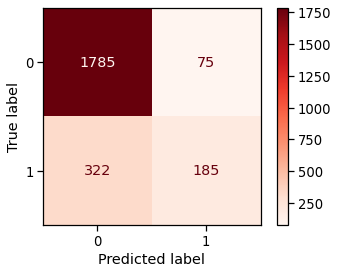

In [56]:
logreg.fit(X_train_final, y_train)

lr_train = logreg.predict(X_train_final)
lr_test = logreg.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_train_final, y_train, cmap='Reds'))

### SVM

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1860
           1       0.73      0.47      0.57       507

    accuracy                           0.85      2367
   macro avg       0.80      0.71      0.74      2367
weighted avg       0.84      0.85      0.84      2367

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       465
           1       0.00      0.00      0.00       127

    accuracy                           0.79       592
   macro avg       0.39      0.50      0.44       592
weighted avg       0.62      0.79      0.69       592

Confusion Matrix      : 


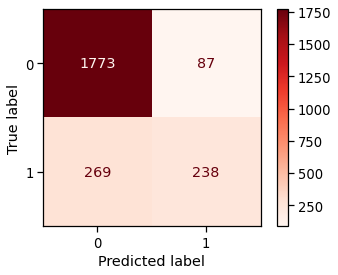

In [57]:
svc.fit(X_train_final, y_train)

svc_train = svc.predict(X_train_final)
svc_test = svc.predict(X_test)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_train_final, y_train, cmap='Reds'))

### Decision Tree

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1860
           1       1.00      0.91      0.95       507

    accuracy                           0.98      2367
   macro avg       0.99      0.95      0.97      2367
weighted avg       0.98      0.98      0.98      2367

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       465
           1       0.27      0.12      0.16       127

    accuracy                           0.74       592
   macro avg       0.53      0.51      0.51       592
weighted avg       0.68      0.74      0.70       592

Confusion Matrix      : 


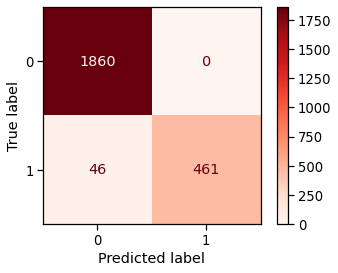

In [58]:
dtc.fit(X_train_final, y_train)

dtc_train = dtc.predict(X_train_final)
dtc_test = dtc.predict(X_test)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, X_train_final, y_train, cmap='Reds'))

### Random Forest

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1860
           1       0.99      0.92      0.95       507

    accuracy                           0.98      2367
   macro avg       0.98      0.96      0.97      2367
weighted avg       0.98      0.98      0.98      2367

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       465
           1       0.69      0.35      0.47       127

    accuracy                           0.83       592
   macro avg       0.77      0.66      0.68       592
weighted avg       0.81      0.83      0.81       592

Confusion Matrix      : 


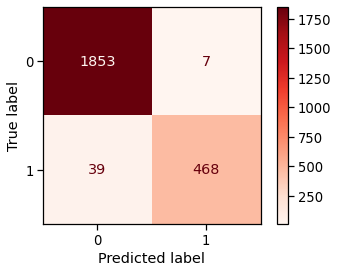

In [59]:
rfc.fit(X_train_final, y_train)

rfc_train = rfc.predict(X_train_final)
rfc_test = rfc.predict(X_test)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, X_train_final, y_train, cmap='Reds'))

### KNN

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1860
           1       0.73      0.47      0.57       507

    accuracy                           0.85      2367
   macro avg       0.80      0.71      0.74      2367
weighted avg       0.84      0.85      0.84      2367

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       465
           1       0.00      0.00      0.00       127

    accuracy                           0.79       592
   macro avg       0.39      0.50      0.44       592
weighted avg       0.62      0.79      0.69       592

Confusion Matrix      : 


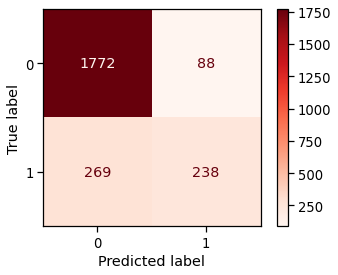

In [60]:
knn.fit(X_train_final, y_train)

knn_train = knn.predict(X_train_final)
knn_test = knn.predict(X_test)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_final, y_train, cmap='Reds'))

### Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1860
           1       0.57      0.45      0.50       507

    accuracy                           0.81      2367
   macro avg       0.71      0.68      0.69      2367
weighted avg       0.80      0.81      0.80      2367

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       465
           1       0.00      0.00      0.00       127

    accuracy                           0.79       592
   macro avg       0.39      0.50      0.44       592
weighted avg       0.62      0.79      0.69       592

Confusion Matrix      : 


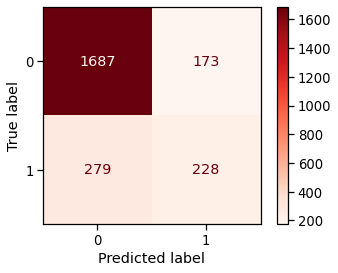

In [61]:
gnb.fit(X_train_final, y_train)

gnb_train = gnb.predict(X_train_final)
gnb_test = gnb.predict(X_test)

print(classification_report(y_train, gnb_train))
print(classification_report(y_test, gnb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gnb, X_train_final, y_train, cmap='Reds'))

### AdaBoost Classifier

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1860
           1       0.73      0.42      0.53       507

    accuracy                           0.84      2367
   macro avg       0.79      0.69      0.72      2367
weighted avg       0.83      0.84      0.82      2367

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       465
           1       0.75      0.40      0.52       127

    accuracy                           0.84       592
   macro avg       0.80      0.68      0.71       592
weighted avg       0.83      0.84      0.82       592

Confusion Matrix      : 


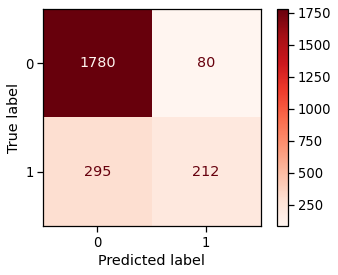

In [62]:
adb.fit(X_train_final, y_train)

adb_train = adb.predict(X_train_final)
adb_test = adb.predict(X_test)

print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, X_train_final, y_train, cmap='Reds'))

### Bagging Clasifier

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1860
           1       0.97      0.83      0.90       507

    accuracy                           0.96      2367
   macro avg       0.96      0.91      0.94      2367
weighted avg       0.96      0.96      0.96      2367

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       465
           1       0.53      0.17      0.25       127

    accuracy                           0.79       592
   macro avg       0.67      0.56      0.56       592
weighted avg       0.75      0.79      0.74       592

Confusion Matrix      : 


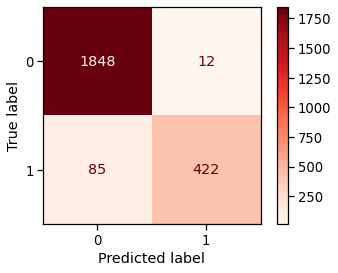

In [63]:
bag_clf.fit(X_train_final, y_train)

bag_clf_train = bag_clf.predict(X_train_final)
bag_clf_test = bag_clf.predict(X_test)

print(classification_report(y_train, bag_clf_train))
print(classification_report(y_test, bag_clf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(bag_clf, X_train_final, y_train, cmap='Reds'))

Nilai accuracy yang didapatkan dari beberapa model sbb :

1. LogisticRegression
2. SVM 
3. RandomForest
4. KNN
5. NaiveBayes
6. SGD 
7. Bagging

# 13.3 - Cross Validation

Untuk mendapatkan nilai cross validation diambil dari nilai akurasinya

Logistic Regression

In [64]:
cv_logrec = cross_val_score(logreg,X_train_final, y_train, cv=3, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_logrec)
print('accuracy Score - Mean - Cross Validation : ', cv_logrec.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_logrec.std())
print('accuracy Score - Range of Test-Set       : ', (cv_logrec.mean()-cv_logrec.std()) , '-', (cv_logrec.mean()+cv_logrec.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.84283904 0.82129278 0.82636248]
accuracy Score - Mean - Cross Validation :  0.8301647655259822
accuracy Score - Std - Cross Validation  :  0.00919794721465026
accuracy Score - Range of Test-Set       :  0.8209668183113319 - 0.8393627127406325


SVM

In [65]:
cv_svc = cross_val_score(svc,X_train_final, y_train, cv=3, scoring='accuracy')

print('SVM')
print('accuracy Score - All - Cross Validation  : ', cv_svc)
print('accuracy Score - Mean - Cross Validation : ', cv_svc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_svc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_svc.mean()-cv_svc.std()) , '-', (cv_svc.mean()+cv_svc.std()))

SVM
accuracy Score - All - Cross Validation  :  [0.83776933 0.82636248 0.82382763]
accuracy Score - Mean - Cross Validation :  0.8293198141106887
accuracy Score - Std - Cross Validation  :  0.006063667129027164
accuracy Score - Range of Test-Set       :  0.8232561469816615 - 0.8353834812397158


Dessision Tree

In [66]:
cv_dtc = cross_val_score(dtc,X_train_final, y_train, cv=3, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_dtc)
print('accuracy Score - Mean - Cross Validation : ', cv_dtc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_dtc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_dtc.mean()-cv_dtc.std()) , '-', (cv_dtc.mean()+cv_dtc.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.72750317 0.73637516 0.74397972]
accuracy Score - Mean - Cross Validation :  0.7359526827207437
accuracy Score - Std - Cross Validation  :  0.006733154816438186
accuracy Score - Range of Test-Set       :  0.7292195279043054 - 0.7426858375371819


random forest

In [67]:
cv_rfc = cross_val_score(rfc,X_train_final, y_train, cv=3, scoring='accuracy')

print('RandomForest')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

RandomForest
accuracy Score - All - Cross Validation  :  [0.8225602  0.7896071  0.79721166]
accuracy Score - Mean - Cross Validation :  0.8031263202365864
accuracy Score - Std - Cross Validation  :  0.014088155471510795
accuracy Score - Range of Test-Set       :  0.7890381647650756 - 0.8172144757080971


KNN

In [68]:
cv_knn = cross_val_score(knn,X_train_final, y_train, cv=3, scoring='accuracy')

print('KNN')
print('accuracy Score - All - Cross Validation  : ', cv_knn)
print('accuracy Score - Mean - Cross Validation : ', cv_knn.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_knn.std())
print('accuracy Score - Range of Test-Set       : ', (cv_knn.mean()-cv_knn.std()) , '-', (cv_knn.mean()+cv_knn.std()))

KNN
accuracy Score - All - Cross Validation  :  [0.8225602  0.79974651 0.81115336]
accuracy Score - Mean - Cross Validation :  0.8111533586818758
accuracy Score - Std - Cross Validation  :  0.009313649212103328
accuracy Score - Range of Test-Set       :  0.8018397094697725 - 0.8204670078939791


Naive Bayes

In [69]:
cv_gnb = cross_val_score(gnb,X_train_final, y_train, cv=3, scoring='accuracy')

print('NaiveBayes')
print('accuracy Score - All - Cross Validation  : ', cv_gnb)
print('accuracy Score - Mean - Cross Validation : ', cv_gnb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_gnb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_gnb.mean()-cv_gnb.std()) , '-', (cv_gnb.mean()+cv_gnb.std()))

NaiveBayes
accuracy Score - All - Cross Validation  :  [0.82129278 0.79214195 0.81242079]
accuracy Score - Mean - Cross Validation :  0.8086185044359949
accuracy Score - Std - Cross Validation  :  0.01220070053079311
accuracy Score - Range of Test-Set       :  0.7964178039052018 - 0.8208192049667881


Adaboost Classifier

In [70]:
cv_adb = cross_val_score(adb,X_train_final, y_train, cv=3, scoring='accuracy')

print('AdaBoostClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

AdaBoostClassifier
accuracy Score - All - Cross Validation  :  [0.82889734 0.82889734 0.83143219]
accuracy Score - Mean - Cross Validation :  0.8297422898183354
accuracy Score - Std - Cross Validation  :  0.0011949417510545726
accuracy Score - Range of Test-Set       :  0.8285473480672808 - 0.83093723156939


Bagging Classifier

In [71]:
cv_bag_clf = cross_val_score(bag_clf,X_train_final, y_train, cv=3, scoring='accuracy')

print('BaggingClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_bag_clf)
print('accuracy Score - Mean - Cross Validation : ', cv_bag_clf.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_bag_clf.std())
print('accuracy Score - Range of Test-Set       : ', (cv_bag_clf.mean()-cv_bag_clf.std()) , '-', (cv_bag_clf.mean()+cv_bag_clf.std()))

BaggingClassifier
accuracy Score - All - Cross Validation  :  [0.80228137 0.76932826 0.79340938]
accuracy Score - Mean - Cross Validation :  0.7883396704689479
accuracy Score - Std - Cross Validation  :  0.013922481667329187
accuracy Score - Range of Test-Set       :  0.7744171888016187 - 0.8022621521362772


In [72]:
crossval = [cv_logrec, cv_svc, cv_dtc, cv_rfc, cv_knn, cv_gnb, cv_adb, cv_bag_clf]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'AdaBoost Classifier', 'Bagging Classifier']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Logistic Regression,0.830,0.009
1,AdaBoost Classifier,0.830,0.001
2,SVM,0.829,0.006
3,KNN,0.811,0.009
4,Naive Bayes,0.809,0.012
5,Random Forest,0.803,0.014
6,Bagging Classifier,0.788,0.014
7,Decision Tree,0.736,0.007


Saya akan memilih AdaBoost Classifier untuk di Hyperparameter Tuning karena Nilai Mean nya sebesar 0.830 dan nilai Standar Deviasi nya lebih kecil dari model yang lain agar nilai rentang persebaran datanya makin bagus.

# 13.4 - Hyperparameter Tuning

karena AdaBoost paling tinggi Mean nya dan STD nya rendah jadi kita pakai Adaboost Regression

In [73]:
y_train.isnull().sum().sum()

0

In [74]:
param_grid = [{'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [0.25, 0.5, 0.75, 1, 1.25],
              'n_estimators': [2, 4, 6, 8, 10],
              'random_state': [1, 10, 100]}]

In [75]:
grid_search = GridSearchCV(adb, param_grid, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.25, 0.5, 0.75, 1, 1.25],
                          'n_estimators': [2, 4, 6, 8, 10],
                          'random_state': [1, 10, 100]}],
             return_train_score=True, scoring='recall')

In [76]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'algorithm': 'SAMME.R', 'learning_rate': 1.25, 'n_estimators': 4, 'random_state': 1}
best score: 0.4161735700197238


In [77]:
ab = grid_search.best_estimator_
print(ab)

AdaBoostClassifier(learning_rate=1.25, n_estimators=4, random_state=1)


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1860
           1       0.69      0.41      0.52       507

    accuracy                           0.84      2367
   macro avg       0.77      0.68      0.71      2367
weighted avg       0.82      0.84      0.82      2367

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       465
           1       0.74      0.44      0.55       127

    accuracy                           0.85       592
   macro avg       0.80      0.70      0.73       592
weighted avg       0.84      0.85      0.83       592

Confusion Matrix      : 


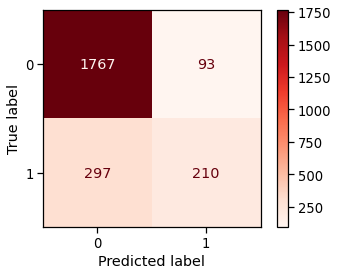

In [78]:
ab_train = ab.predict(X_train_final)
ab_test = ab.predict(X_test)

print(classification_report(y_train, ab_train))
print(classification_report(y_test, ab_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab, X_train_final, y_train, cmap='Reds'))

yang satu yang ada tunggakan nya 
- precision : model nge predict ada tunggakan padahal nyatanya dia ga ada tunggakan 
- recall : model nge predict dia ga ada tunggakan nyatanya dia ada tunggakan 
- f1 Score : rat2 dari precision dan recall 

# 14 - Model Inference

In [79]:
df_inf.head(5)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
0,180000.0,2,1,1,38.0,0,0,0,0,0,0,750,0,0,0,0,0,0,0,0,0,0,0,0
1,200000.0,2,2,1,27.0,1,3,2,2,2,2,183994,182427,182657,174547,181454,177141,5200,7000,0,13300,0,6200,1
2,50000.0,1,2,2,26.0,2,0,0,0,0,0,291,291,291,291,291,0,291,291,291,291,0,873,0
3,240000.0,1,2,2,29.0,0,0,0,0,0,0,243774,242529,242079,243114,213930,219009,8891,12350,15969,7968,8700,17500,0
4,20000.0,2,2,2,39.0,0,0,0,0,0,0,20885,20373,19391,20085,19938,0,2157,1660,1300,541,0,0,0


In [80]:
inf = wins.transform(df_inf)
inf.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
0,180000.0,2,1,1,38.0,0,0,0,0,0,0,750,0,0,0,0,0,0,0,0,0,0,0,0
1,200000.0,2,2,1,27.0,1,3,2,2,2,2,183994,182427,182657,174547,181454,177141,5200,7000,0,13300,0,6200,1
2,50000.0,1,2,2,26.0,2,0,0,0,0,0,291,291,291,291,291,0,291,291,291,291,0,873,0
3,240000.0,1,2,2,29.0,0,0,0,0,0,0,243774,242529,242079,243114,213930,219009,8891,12350,15969,7968,8700,17500,0
4,20000.0,2,2,2,39.0,0,0,0,0,0,0,20885,20373,19391,20085,19938,0,2157,1660,1300,541,0,0,0


In [81]:
inf_num = inf[num_columns]
inf_cat = inf[cat_columns]

In [82]:
inf_num_scaled = scaler.transform(inf_num)
inf_num_scaled

array([[0.34693878, 0.43037975],
       [0.3877551 , 0.15189873],
       [0.08163265, 0.12658228],
       [0.46938776, 0.20253165],
       [0.02040816, 0.4556962 ]])

In [83]:
inf_final = np.concatenate([inf_num_scaled, inf_cat], axis=1)

In [84]:
y_pred_inf = svc.predict(inf_final)
y_pred_inf

array([0, 1, 1, 0, 0], dtype=int64)

In [85]:
y_pred_inf = svc.predict(inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['pred_payment'])


In [86]:
pd.concat([df_inf, y_pred_inf_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment,pred_payment
0,180000.0,2,1,1,38.0,0,0,0,0,0,0,750,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200000.0,2,2,1,27.0,1,3,2,2,2,2,183994,182427,182657,174547,181454,177141,5200,7000,0,13300,0,6200,1,1
2,50000.0,1,2,2,26.0,2,0,0,0,0,0,291,291,291,291,291,0,291,291,291,291,0,873,0,1
3,240000.0,1,2,2,29.0,0,0,0,0,0,0,243774,242529,242079,243114,213930,219009,8891,12350,15969,7968,8700,17500,0,0
4,20000.0,2,2,2,39.0,0,0,0,0,0,0,20885,20373,19391,20085,19938,0,2157,1660,1300,541,0,0,0,0


# 15 - Conclusion

**Kesimpulan dari analisis yang telah dilakukan adalah sebagai berikut:**

1. Berdasarkan analisis yang telah dilakukan, saya berhasil membuat model machine learning untuk memprediksi probabilitas pemegang kartu kredit akan gagal bayar atau tidak.
2. Menurut saya, faktor yang bisa menentukan seorang pemegang kartu kredit akan wanprestasi atau tidak adalah saldo limit kartu kredit, status perkawinan, usia, jenis kelamin, tingkat pendidikan, dan yang paling penting status cicilannya hanya dalam 1 bulan.
3. Berdasarkan analisis, dapat disimpulkan bahwa AdaBoost berusaha mencari margin (jarak antara garis dan support vector) yang “terbaik” yang memisahkan kelas-kelas dan hal ini mengurangi resiko kesalahan pada data.
4. Model prediktor yang digunakan untuk memprediksi kemungkinan tersebut adalah Model AdaBoost dengan nilai Recall sebesar 0,44.
5. Saya juga telah membuat model AdaBoost dengan penyetelan hyperparameter, tetapi model tersebut memiliki nilai recall 0.44 di bawah Model AdaBoost Baseline. Hal ini dapat disebabkan oleh beberapa hal yaitu kelas target yang tidak seimbang. Kelas NonDefault memiliki proporsi 77% dari total data, sedangkan kelas Default hanya 23% dari total data.
6. **Model kami sama sekali tidak bagus untuk memprediksi default pada orang-orang bahkan setelah penyetelan**. Ini karena data kami **tidak seimbang antara kategori dalam target**. Hal ini dapat dihindari dengan melakukan beberapa oversampling atau undersampling agar data kita seimbang untuk pelatihan, dan semoga mendapatkan hasil yang lebih baik.

## **CONCEPTUAL PROBLEMS**

#### 1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Parameter kriteria adalah metode yang akan kita pilih saat melakukan operasi pemisahan. Karena konsep pohon keputusan adalah partisi, maka sangat penting dalam menentukan bagaimana dan kapan membaginya. Ada beberapa konsep yang dijelaskan sebagai berikut:

<h3>Entropi</h3>
- Entropi adalah ukuran ketidakteraturan suatu sistem. Dalam kasus ilmu data, ini adalah ukuran ketidakmurnian dalam suatu perpecahan. Pemisahan dengan lebih sedikit entropi memastikan hasil yang optimal. Pemisahan dengan lebih sedikit entropi memastikan hasil yang optimal. Entropi berkisar dari 0 hingga 1. Jika entropi adalah 0, anggap sebagai sub-pohon murni dan entropi menjadi 1 jika semua label terdistribusi secara merata dalam daun

<h3>Perolehan Informasi</h3>
- Keuntungan informasi mengukur kualitas perpecahan. Ini mempelajari seberapa banyak kita telah mengurangi entropi saat kita melakukan pemisahan.

<h3>Gini</h3>
- Metode lainnya adalah pengotor **Gini**. Itu juga mengukur kemurnian partisi dalam mekanisme yang berbeda. Nilai entropi bervariasi antara 0 dan 1, tetapi Gini berkisar antara 0 dan 0,5. Karena mekanisme penghitungan Gini berbeda dengan Entropi, daya komputasi berkurang karena **Gini** tidak menghitung fungsi log, bukan **Entropi**. Jadi dalam kasus di mana waktu penyelesaian harus cepat, **Gini** lebih disukai.

#### 2. Apakah fungsi dari `pruning` pada Tree model?

Pohon keputusan cenderung terlalu pas. Pohon keputusan akan selalu melengkapi data pelatihan jika kita membiarkannya tumbuh hingga kedalaman maksimalnya, jadi `Pemangkasan` akan berguna. Pemangkasan adalah teknik yang digunakan untuk mengurangi overfitting. Pemangkasan juga menyederhanakan pohon keputusan dengan menghapus aturan terlemah. `Pemangkasan` dikategorikan menjadi dua segmen:

<h3>Pra - Pemangkasan</h3>
- Pra - Pemangkasan menghentikan pohon sebelum selesai mengklasifikasikan set pelatihan

<h3> Posting - Pemangkasan</h3>
- Pasca - Pemangkasan memungkinkan pohon untuk mengklasifikasikan set pelatihan dengan sempurna dan kemudian memangkas pohon tersebut.

Pemangkasan dimulai dengan pohon yang tidak dipangkas, mengambil urutan pohon yang dipangkas dan terakhir menemukan yang terbaik melalui validasi silang. Ada beberapa hal yang perlu diperhatikan dalam penggunaan pruning pada pohon keputusan, beberapa di antaranya adalah :

1. Subpohon sudah optimal, artinya subpohon yang memiliki akurasi validasi silang tertinggi atau parameter lainnya

2. Pencarian untuk subpohon yang optimal harus dapat ditelusuri secara komputasi.

#### 3. Bagaimana cara memilih `K` yang optimal pada KNN?

`K-Nearest Neighbor` atau `KNN` memprediksi kategori titik uji dari label kelas uji yang tersedia dengan mencari jarak antara titik uji dan nilai fitur K Terdekat yang dilatih. Langkah mengklasifikasikan record yang tidak dikenal di KNN adalah pertama-tama menginisialisasi nilai K. Kemudian kami menghitung jarak antara input tes dan K tetangga terdekat yang dilatih. Setelah itu memeriksa kategori kelas tetangga terdekat dan menentukan jenis input tes yang jatuh. Klasifikasi dihasilkan dengan mengambil suara terbanyak. Tapi kemudian kami bertanya-tanya apa nilai K terbaik untuk dipilih dalam data kami? Berikut adalah beberapa langkah untuk menemukan nilai K yang tepat :

1. Sebenarnya **tidak ada metode statistik yang ditentukan** untuk menemukan nilai K terbaik
2. Selanjutnya kita input nilai K berdasarkan **asumsi pribadi**
3. Hati-hati! menggunakan nilai **kecil** dari nilai K mengarah ke **batas keputusan yang tidak stabil**
4. Nilai K yang substansial lebih baik untuk klasifikasi karena mengarah pada kelancaran batas keputusan
5. Buat plot antara tingkat kesalahan dan K yang menunjukkan nilai dalam rentang yang ditentukan dalam data kita. Kemudian pilih nilai K berdasarkan tingkat kesalahan minimum.

#### 4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!

`Validasi silang` digunakan untuk menilai evaluasi model pembelajaran mesin dengan melatih beberapa model pada subset data input yang tersedia dan mengevaluasinya pada subset data pelengkap. Dengan menggunakan validasi silang, ada kemungkinan besar kami dapat mendeteksi pemasangan berlebih dengan mudah. Untuk melakukan `validasi silang`, kita harus membuat jumlah lipatan (partisi) data yang tetap dan kemudian melakukan analisis pada setiap lipatan. Kemudian rata-rata estimasi kesalahan keseluruhan.

#### 5. Jelaskan apa yang kalian ketahui tentang `Accuracy, Precision, Recall, F1 Score!`

Akurasi adalah sejumlah poin data yang diprediksi dengan benar dari semua data. Presisi pada dasarnya adalah semua hal yang Anda katakan relevan sedangkan Recall adalah semua hal yang sebenarnya relevan. Dengan kata lain, daya ingat juga disebut sebagai sensitivitas model Anda, sedangkan presisi disebut sebagai Nilai Prediksi Positif. Skor F1 adalah rata-rata tertimbang dari presisi dan daya ingat.

Berikut adalah metrik perhitungan dari masing-masing laporan klasifikasi :
- Akurasi = (TP + TN) /(TP + TN + FP + FN)
- Presisi = (TP) / (TP + FP)
- Ingat = (TP) / (TP + FN)
- Skor F1 = (2 x Presisi x Recall) / (Precision + Recall)